### Практикум 8
### Вариант 5
### Ананьев Роман

In [1]:
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline 

# Задание 1
<!-- В файле «Данные 8_1» приведены данные успеваемости
студентов 1-го курса по четырем математическим дисциплинам по 100
балльной шкале (нормированные к 1). Иван и Петр, входящие в число
этих студентов, поспорили насчет того, по каким дисциплинам у их од-
нокурсников хороших оценок больше, а по каким меньше. Иван думает,
что в этом плане между дисциплинами особой разницы нет, а Петр наста-
ивает, что есть. Подумав, они решили, что для объективного разрешения
спора им надо, опираясь на методы математической статистики, сопоста-
вить вероятности получения не менее 𝑀 баллов в разных парах дисци-
плин (а именно, проверить гипотезы о равенстве вероятностей получения
не менее 𝑀 баллов по этим дисциплинам (см. п. 5 подраздела 8.2)). Ваша
задача – помочь Ивану и Петру, взяв на себя анализ пары дисциплин (в
соответствии с вашим вариантом). Нужно найти диапазоны значений 𝑀,
при которых на уровне значимости 𝛼 = 0,05 данные подтверждают мне-
ние Ивана, и диапазоны значений 𝑀, при которых на уровне значимости
𝛼 = 0,05 , данные подтверждают мнение Петра.
7
Замечание. Данные реальные и требуют предварительной обра-
ботки.
Вариант 1: ОМА и МА
Вариант 2: ОМА и АиГ
Вариант 3: ОМА и ДУ
Вариант 4: МА и АиГ
Вариант 5: МА и ДУ
Вариант 6: АиГ и ДУ -->

In [4]:
sample = pd.read_excel("Data_8_1.xlsx", header = 0)
DU_sample = sample[sample.keys()[0]].dropna()
MA_sample = sample[sample.keys()[1]].dropna()

In [5]:
MA_sample

0      0.155
1      0.714
2      0.867
3      0.873
4      0.520
       ...  
260    0.935
261    0.510
262    0.345
263    0.205
264    0.505
Name:  МА_итог, Length: 263, dtype: float64

In [6]:
DU_sample

0      0.185
1      0.875
2      0.935
3      0.950
4      0.520
       ...  
260    0.935
261    0.705
262    0.505
263    0.505
264    0.640
Name:  ДУ_итог, Length: 264, dtype: float64

In [7]:
n1 = len(MA_sample)
n2 = len(DU_sample)


def M_p_value(M, sample1, sample2):
    n11 = sum(x < M for x in sample1)
    n12 = n1 - n11
    n21 = sum(x < M for x in sample2)
    n22 = n2 - n21
    chi2_stat = (n1 + n2) * (n11 * n22 - n12 * n21)**2 / ((n1 * n2) * (n11 + n21) * (n12 + n22))
    
    return 1 - sts.chi2(1).cdf(chi2_stat), n11, n21

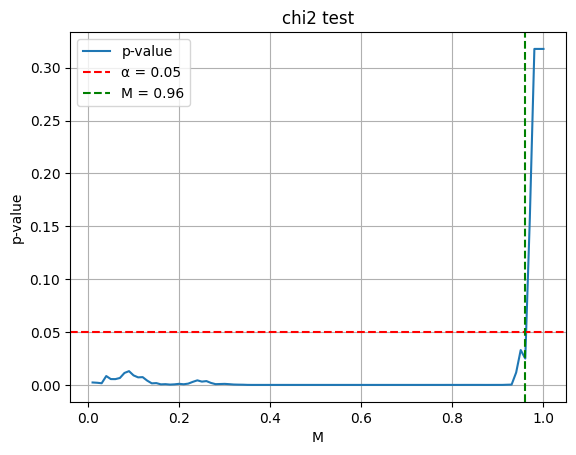

In [8]:
M = [i/100 for i in range(1, 101)]
p_values = [M_p_value(m, MA_sample, DU_sample)[0] for m in M]
plt.plot(M, p_values, label='p-value')
plt.axhline(y=0.05, color='r', linestyle='--', label='α = 0.05')
plt.axvline(0.96, color='g', linestyle='--', label='M = 0.96')
plt.xlabel('M')
plt.ylabel('p-value')
plt.title('chi2 test')
plt.grid(True)
plt.legend()
plt.show()

In [9]:
# z - критерий
def z_test(M, sample1, sample2):

    n1 = len(sample1)
    n2 = len(sample2)
    p1 = np.sum(sample1 < M) / n1  # доля в первой выборке
    p2 = np.sum(sample2 < M) / n2  # доля во второй выборке
    
    p_pooled = (np.sum(sample1 < M) + np.sum(sample2 < M)) / (n1 + n2)
    se = np.sqrt(p_pooled * (1 - p_pooled) * (1/n1 + 1/n2))
    z_stat = (p1 - p2) / se
    
    p_value = 2 * (1 - sts.norm.cdf(np.abs(z_stat)))
    
    return z_stat, p_value

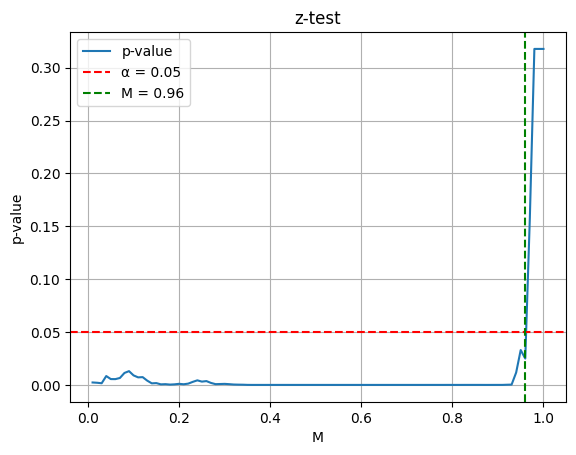

In [10]:
p_values = [z_test(m, MA_sample, DU_sample)[1] for m in M]
plt.plot(M, p_values, label='p-value')
plt.axhline(y=0.05, color='r', linestyle='--', label='α = 0.05')
plt.axvline(0.96, color='g', linestyle='--', label='M = 0.96')
plt.xlabel('M')
plt.ylabel('p-value')
plt.title('z-test')
plt.grid(True)
plt.legend()
plt.show()

При M < 0.96 отвергаем гипотезу о равенстве значений вероятности. При M > 0.96 гипотезу можем принять

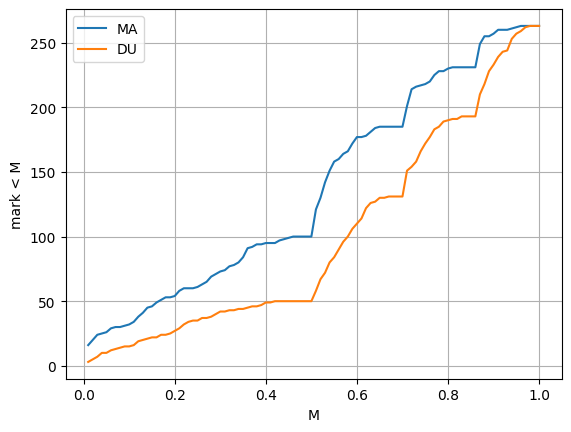

In [11]:
#проверка 
n111 = [M_p_value(m, MA_sample, DU_sample)[1] for m in M]
n222 = [M_p_value(m, MA_sample, DU_sample)[2] for m in M]
plt.plot(M, n111, label='MA')
plt.plot(M, n222, label='DU')
plt.xlabel('M')
plt.ylabel('mark < M')
plt.legend()
plt.grid(1)
plt.show()

# Задание 2

#### 2.1

In [12]:
# H1: varA != varB
mA, sigmaA = 5.0, 2.0  # среднее и ст. отклонение A
mB, sigmaB = 5.3, 1.9   # среднее и ст. отклонение B
nA, nB = 100, 80        # объемы выборок

sampleA = np.random.normal(mA, sigmaA, nA)
sampleB = np.random.normal(mB, sigmaB, nB)

varA = np.var(sampleA, ddof=1)  
varB = np.var(sampleB, ddof=1)

F_observed = varA / varB

alpha = 0.05
F_crit = sts.f.ppf(1 - alpha/2, nA, nB)


print("Результаты теста Фишера:")
print(f"Выборочная дисперсия A: {varA:.4f}")
print(f"Выборочная дисперсия B: {varB:.4f}")
print(f"F-статистика: {F_observed:.4f}")
print(f"Критическое значение: {F_crit:.4f}")

print(f"{F_observed} > {F_crit}")
print("Отвергаем H0 - дисперсии различаются значимо")


Результаты теста Фишера:
Выборочная дисперсия A: 3.6449
Выборочная дисперсия B: 2.7799
F-статистика: 1.3112
Критическое значение: 1.5271
1.3111920967913933 > 1.527137820716556
Отвергаем H0 - дисперсии различаются значимо


#### 2.2

In [13]:
# H1: mA != mB
_, p_value = sts.ttest_ind(sampleA, sampleB, equal_var=False)  # дисперсии не равны
print(f"p-value: {p_value:.2f}")
print(f"Диапазон α: 0 < α < {p_value:.2f}")

p-value: 0.22
Диапазон α: 0 < α < 0.22
